[-4.2774     -4.29974    -4.24042661 -4.2547953  -4.25660772 -4.25784643
 -4.2635247  -4.25157012 -4.25510107 -4.24772515 -4.2858347  -4.259
 -4.24078635 -4.2799087  -4.259      -4.25657249 -4.26105    -4.259      -4.2553
 -4.23669444 -4.2835689  -4.31388169 -4.2430915  -4.24090034 -4.2492289
 -4.24079493 -4.2835689  -4.249699   -4.29193    -4.18333    -4.2835689
 -4.25297686 -4.27076771 -4.2630401  -4.25566743 -4.259      -4.28533933
 -4.2667922  -4.26437688 -4.2835689  -4.28533933 -4.259      -4.25566743]

[ 55.8715      55.86455     55.86405543  55.8573154   55.86545086
  55.86118449  55.8406719   55.86712477  55.86222225  55.86031524
  55.828935    55.858       55.86135313  55.8308287   55.858       55.86549316
  55.8376      55.858       55.8574      55.85516667  55.8662949
  55.84718953  55.8570197   55.86147965  55.8546672   55.86136883
  55.8662949   55.8570333   55.8682      55.8167      55.8662949
  55.86245205  55.86448912  55.8651484   55.86235105  55.858       55.85992997


<IPython.core.display.Javascript object>


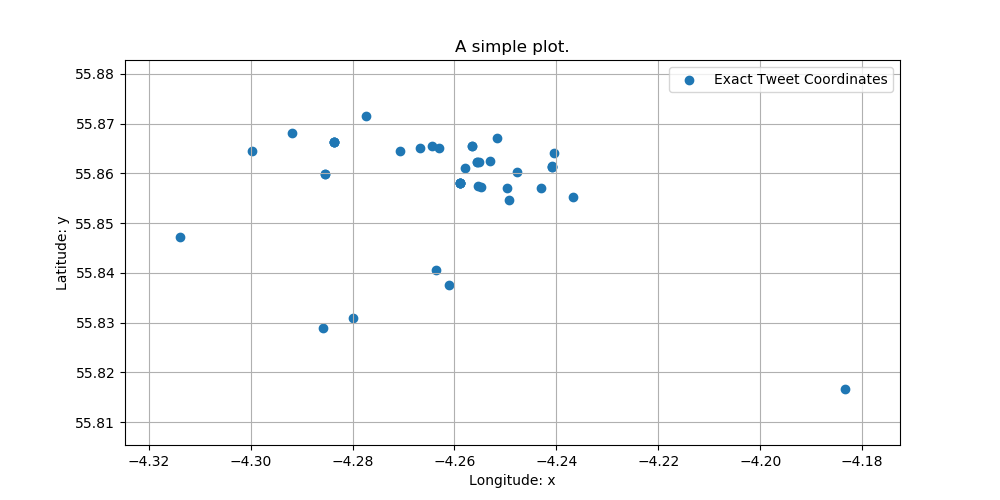

In [1]:
import csv
import operator
import numpy as np
%matplotlib notebook
import re
import json
import matplotlib as mpl   
import matplotlib.pyplot as plt
from __future__ import print_function, division

a = []
b = []
ab = np.empty((43,2))
with open('geocoordinatedata.csv', 'rt', encoding='utf8') as csvfile:
    csv.reader(csvfile, delimiter=' ', quotechar='|')
    sort = sorted(csvfile, key=operator.itemgetter(0))
    
    for eachline in sort:
        coordinates = eachline.split('":{"type":"Point","coordinates":')[1].split('},"source')[0]
        filtered_tweets = list(filter(bool, re.split('[^a-z]', json.loads(eachline)["text"].lower())))
        x = (coordinates.split('[')[1].split(',')[0])
        y = (coordinates.split(',')[1].split(']')[0])
        x_float, y_float = float(x), float(y)
        a.append(x_float)
        b.append(y_float)
        a_array, b_array = np.asarray(a), np.asarray(b)
    print(a_array)
    print() 
    print(b_array)
    final = np.stack((a_array, b_array), axis=1)
    print(final)
    
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(final[:,0], final[:,1], label='Exact Tweet Coordinates')
    
    ax.set_xlabel("Longitude: x")
    ax.set_ylabel("Latitude: y")
    ax.set_title("A simple plot.")
    ax.legend()
    ax.grid("on")
    
    